<a href="https://colab.research.google.com/github/Julian-Ramirez-M/Talleres/blob/main/Taller_1_Juli%C3%A1n_Ram%C3%ADrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import warnings
from numpy.core.fromnumeric import sort
from scipy import stats 
warnings.filterwarnings("ignore")
!pip install --quiet yfinance
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.3 MB/s eta 0:00:00


**PUNTO 1**

In [2]:
yf.pdr_override()

In [3]:
activos = ["DIS", "HSY"]
precios_d = pdr.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")["Adj Close"]
precios_d
precios_m = pdr.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31", interval="1mo")["Adj Close"]
precios_m


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


,DIS,HSY
Date,,
2021-01-01,168.169998,140.011658
2021-02-01,189.039993,140.213806
2021-03-01,184.520004,153.070374
2021-04-01,186.020004,159.012756
2021-05-01,178.649994,167.481186
2021-06-01,175.770004,169.365219
2021-07-01,176.020004,173.935303
2021-08-01,181.300003,172.787918
2021-09-01,169.169998,165.401688


**Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los resultados en una tabla**

In [4]:
retornos_d = np.log(precios_d/precios_d.shift()).dropna();
retornos_m = np.log(precios_m/precios_m.shift()).dropna();
retornos_a = np.log(precios_d/precios_d.shift(502)).dropna();


In [5]:
retornos_d

,DIS,HSY
Date,,
2021-01-05,0.004268,-0.001127
2021-01-06,0.003804,0.003510
2021-01-07,-0.003019,-0.000595
2021-01-08,0.000616,0.005673
2021-01-11,0.002236,-0.012710
...,...,...
2022-12-23,0.015343,0.004036
2022-12-27,-0.018810,-0.000636
2022-12-28,-0.025802,-0.012207


In [6]:
retornos_m

,DIS,HSY
Date,,
2021-02-01,0.116983,0.001443
2021-03-01,-0.024201,0.087729
2021-04-01,0.008096,0.038087
2021-05-01,-0.040426,0.051887
2021-06-01,-0.016252,0.011186
2021-07-01,0.001421,0.026626
2021-08-01,0.029555,-0.006618
2021-09-01,-0.069249,-0.043688
2021-10-01,-0.000591,0.035407


In [7]:
retornos_a

,DIS,HSY
Date,,
2022-12-30,-0.715456,0.466303


**Calcule los retornos esperados y volatilidades anualizadas.**

Volatilidad Close to Close

In [8]:
retornos_d.std()

DIS    0.019992
HSY    0.011465
dtype: float64

In [9]:
retornos_d.mean()*np.sqrt(252)

DIS   -0.022625
HSY    0.014746
dtype: float64

Volatilidad de Parkinson

In [10]:
precios_vol = pdr.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")
retorno_vol = np.log(precios_vol["High"]/precios_vol["Low"]).dropna()
sigma_parki = ((1/(4*np.log(2)))*retorno_vol**2)**0.5
sigma_parki


[*********************100%***********************]  2 of 2 completed


,DIS,HSY
Date,,
2021-01-04,0.026425,0.015183
2021-01-05,0.013948,0.008099
2021-01-06,0.014492,0.011900
2021-01-07,0.007962,0.008257
2021-01-08,0.011519,0.005903
...,...,...
2022-12-23,0.015892,0.005497
2022-12-27,0.013676,0.004372
2022-12-28,0.018430,0.009548


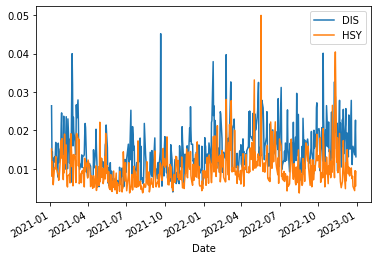

In [11]:
sigma_parki.plot();

In [12]:
sigma_parki.mean()*np.sqrt(252)

DIS    0.230885
HSY    0.160303
dtype: float64

Volatilidad Garman-Klass

In [13]:
retorno_gar = np.log(precios_vol["Close"]/precios_vol["Open"]).dropna()
sigma_vol = (0.5*retorno_vol**2-(2*np.log(2)-1)*retorno_gar**2)**0.5
sigma_vol

,DIS,HSY
Date,,
2021-01-04,0.026793,0.015655
2021-01-05,0.014423,0.009480
2021-01-06,0.016835,0.013828
2021-01-07,0.008814,0.009718
2021-01-08,0.013556,0.006546
...,...,...
2022-12-23,0.012498,0.005897
2022-12-27,0.014244,0.004855
2022-12-28,0.016625,0.006161


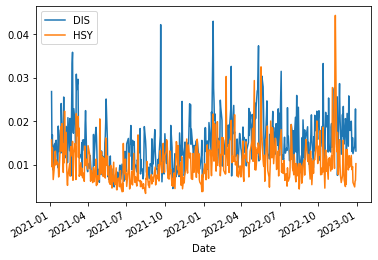

In [14]:
sigma_vol.plot();

In [15]:
(sigma_vol.mean())*np.sqrt(252)

DIS    0.234132
HSY    0.164433
dtype: float64

Volatilidad EWMA

In [16]:
L = 0.94
t = (retornos_d-1)
t1 = t[::-1] 
k = np.arange(84-1,-1,-1)
alpha = np.power(L,k)
pd.Series(alpha)
varEWMA = (alpha[0:2]*retornos_d**2)
np.sqrt(varEWMA)

,DIS,HSY
Date,,
2021-01-05,0.000327,0.000089
2021-01-06,0.000292,0.000278
2021-01-07,0.000232,0.000047
2021-01-08,0.000047,0.000449
2021-01-11,0.000172,0.001005
...,...,...
2022-12-23,0.001177,0.000319
2022-12-27,0.001443,0.000050
2022-12-28,0.001979,0.000966


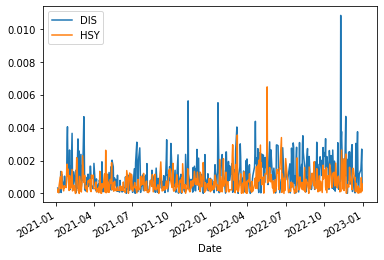

In [17]:
np.sqrt(varEWMA).plot();

In [18]:
var = varEWMA.sum()*(1-L)
vol = np.sqrt(var)
vol*np.sqrt(252)

DIS    0.133799
HSY    0.079202
dtype: float64

**Construya una tabla resumen con las estadísticas descriptivas de las series diarias 
(media, mediana, desv. estándar, curtosis, simetría) de los dos activos.**

In [19]:
describe = retornos_d.describe()
s = pd.DataFrame(retornos_d.skew()).T
s.rename(index={0:"Coef Asimetria"}, inplace=True)
k = pd.DataFrame(retornos_d.kurt()).T
k.rename(index={0:"Kurtosis"}, inplace=True)
pd.concat([describe, s, k], axis =0)


,DIS,HSY
count,502.000000,502.000000
mean,-0.001425,0.000929
std,0.019992,0.011465
min,-0.141139,-0.081874
25%,-0.012993,-0.004896
50%,-0.001267,0.000766
75%,0.008944,0.008143
max,0.061060,0.042942
Coef Asimetria,-0.579021,-0.773853
Kurtosis,5.097278,6.006223


**Compare las distribuciones empíricas de los dos activos con la distribución teórica normal**

In [20]:
from matplotlib import scale
from scipy.stats import norm

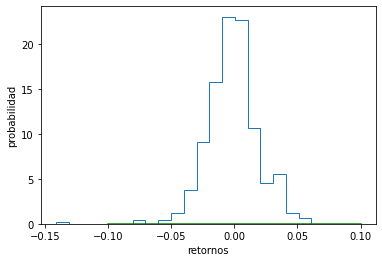

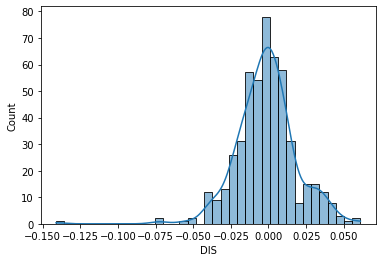

In [21]:
x = np.linspace(-0.1,0.1,num=2)
plt.hist(retornos_d['DIS'],bins=20,density=True,histtype="step")
plt.xlabel("retornos")
plt.ylabel("probabilidad")
plt.plot(x,norm.pdf(x,scale=retornos_d['DIS'].std()),"G")
plt.show()
sns.histplot(retornos_d['DIS'],kde=True);

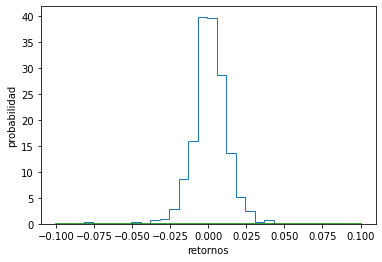

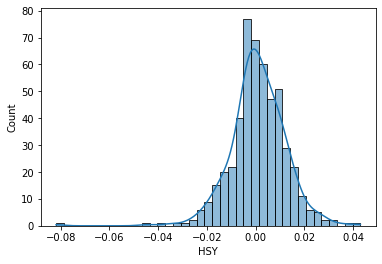

In [22]:
x = np.linspace(-0.1,0.1,num=2)
plt.hist(retornos_d['HSY'],bins=20,density=True,histtype="step")
plt.xlabel("retornos")
plt.ylabel("probabilidad")
plt.plot(x,norm.pdf(x,scale=retornos_d['HSY'].std()),"G")
plt.show()
sns.histplot(retornos_d['HSY'],kde=True);

**Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.**

In [23]:
retornos_d.corr()

,DIS,HSY
DIS,1.000000,0.161494
HSY,0.161494,1.000000


In [24]:
stats.kendalltau(retornos_d['DIS'], retornos_d['HSY'])

KendalltauResult(correlation=0.10178293097021336, pvalue=0.0006525943664161844)

In [25]:
stats.spearmanr(retornos_d['DIS'], retornos_d['HSY'])

SpearmanrResult(correlation=0.1506709322211517, pvalue=0.000707196672842843)

**Punto 2**

In [26]:
activos = ["DIS", "HSY", "JPM", "F", "MCD", "AAPL", "NKE", "META", "GM", "WMT"]
precios2 = pdr.get_data_yahoo(activos,start="2017-12-01",end="2022-12-31")["Adj Close"]
precios2

[*********************100%***********************]  10 of 10 completed


,AAPL,DIS,F,GM,HSY,JPM,MCD,META,NKE,WMT
Date,,,,,,,,,,
2017-12-01,40.600861,101.539314,9.809043,38.449070,99.495979,89.986008,153.584747,175.100006,56.992020,88.377571
2017-12-04,40.304153,106.334091,9.848027,38.682690,101.118248,91.840836,151.612396,171.470001,57.201408,88.068916
2017-12-05,40.266174,103.439865,9.692083,38.458054,101.064468,90.784622,153.691376,172.830002,57.505970,88.813339
2017-12-06,40.116634,101.741920,9.653096,37.873997,101.960770,90.106216,154.126694,176.059998,56.839741,88.314034
2017-12-07,40.190220,101.548965,9.770056,38.100674,101.781487,89.840004,153.620300,180.139999,57.677296,88.323158
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.658981,88.010002,10.686316,33.830002,235.880005,130.317398,267.570007,118.040001,116.250000,143.770004
2022-12-27,129.831772,86.370003,10.535805,33.320000,235.729996,130.774033,266.839996,116.879997,117.559998,143.809998
2022-12-28,125.847855,84.169998,10.300631,32.529999,232.869995,131.488754,265.109985,115.620003,114.980003,141.289993


Calcule los retornos y volatilidades anualizadas.

In [27]:
retornos2 = np.log(precios2/precios2.shift()).dropna();
retornos2

,AAPL,DIS,F,GM,HSY,JPM,MCD,META,NKE,WMT
Date,,,,,,,,,,
2017-12-04,-0.007335,0.046140,0.003966,0.006058,0.016173,0.020403,-0.012925,-0.020949,0.003667,-0.003499
2017-12-05,-0.000943,-0.027596,-0.015962,-0.005824,-0.000532,-0.011567,0.013619,0.007900,0.005310,0.008417
2017-12-06,-0.003721,-0.016551,-0.004031,-0.015303,0.008830,-0.007501,0.002828,0.018516,-0.011653,-0.005638
2017-12-07,0.001833,-0.001898,0.012043,0.005967,-0.001760,-0.002959,-0.003291,0.022909,0.014628,0.000103
2017-12-08,0.000295,-0.001821,0.006364,0.000000,-0.003175,0.012444,0.001387,-0.006349,0.011485,-0.002379
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002802,0.015343,0.004411,0.008908,0.004036,0.004734,0.006750,0.007824,-0.003949,0.002019
2022-12-27,-0.013976,-0.018810,-0.014185,-0.015190,-0.000636,0.003498,-0.002732,-0.009876,0.011206,0.000278
2022-12-28,-0.031166,-0.025802,-0.022574,-0.023995,-0.012207,0.005450,-0.006504,-0.010839,-0.022191,-0.017678


In [28]:
retornos2.std()*np.sqrt(252)

AAPL    0.333019
DIS     0.325576
F       0.416004
GM      0.416739
HSY     0.235199
JPM     0.318376
MCD     0.238524
META    0.440655
NKE     0.331294
WMT     0.233756
dtype: float64

Construya una tabla en la que se muestre un ranqueo de los activos de acuerdo con su 
retorno esperado.


In [29]:
top = retornos2.mean()
top

AAPL    0.000909
DIS    -0.000122
F       0.000085
GM     -0.000105
HSY     0.000661
JPM     0.000306
MCD     0.000422
META   -0.000293
NKE     0.000563
WMT     0.000370
dtype: float64

In [30]:
top = pd.DataFrame(top,columns=["Rendimientos"])
ranking = top.sort_values("Rendimientos",ascending=False)
ranking

,Rendimientos
AAPL,0.000909
HSY,0.000661
NKE,0.000563
MCD,0.000422
WMT,0.000370
JPM,0.000306
F,0.000085
GM,-0.000105
DIS,-0.000122
META,-0.000293


**Punto 3**

In [31]:
precios_rus= yf.download(tickers= '^RUT', start="2011-12-31",end="2022-12-31")["Adj Close"]
precios_rus

[*********************100%***********************]  1 of 1 completed


Date
2012-01-03     752.280029
2012-01-04     747.280029
2012-01-05     752.289978
2012-01-06     749.710022
2012-01-09     753.510010
                 ...     
2022-12-23    1760.930054
2022-12-27    1749.520020
2022-12-28    1722.020020
2022-12-29    1766.250000
2022-12-30    1761.250000
Name: Adj Close, Length: 2768, dtype: float64

In [32]:
retornos_rus= np.log(precios_rus/precios_rus.shift()).dropna()
retornos_rus

Date
2012-01-04   -0.006669
2012-01-05    0.006682
2012-01-06   -0.003435
2012-01-09    0.005056
2012-01-10    0.014807
                ...   
2022-12-23    0.003892
2022-12-27   -0.006501
2022-12-28   -0.015843
2022-12-29    0.025361
2022-12-30   -0.002835
Name: Adj Close, Length: 2767, dtype: float64

**Volatilidad Close to Close**

In [33]:
retornos_rus.std()*np.sqrt(252)

0.2185816915644669

In [34]:
retornos_rus.std()*np.sqrt(12)

0.04769843557741238

**Volatilidad Parkinson**

In [35]:
precios_rus2= yf.download(tickers= '^RUT', start="2011-12-31",end="2022-12-31")
ret_rus_parki = np.log(precios_rus2["High"]/precios_rus2["Low"]).dropna()
rus_parki = ((1/(4*np.log(2)))*ret_rus_parki**2)**0.5
rus_parki

[*********************100%***********************]  1 of 1 completed


Date
2012-01-03    0.007857
2012-01-04    0.005408
2012-01-05    0.014185
2012-01-06    0.007172
2012-01-09    0.005743
                ...   
2022-12-23    0.005997
2022-12-27    0.005552
2022-12-28    0.011027
2022-12-29    0.013946
2022-12-30    0.005713
Length: 2768, dtype: float64

In [36]:
rus_parki.mean()*np.sqrt(252) 

0.1379708438811804

In [37]:
rus_parki.mean()*np.sqrt(12) 

0.03010770646583066

**Volatilidad de Garman-Klass**

In [38]:
ret_rus_gar = np.log(precios_rus2["Close"]/precios_rus2["Open"]).dropna()
rus_gar = (0.5*ret_rus_parki**2-(2*np.log(2)-1)*ret_rus_gar**2)**0.5
rus_gar

Date
2012-01-03    0.009158
2012-01-04    0.006305
2012-01-05    0.015112
2012-01-06    0.008208
2012-01-09    0.006752
                ...   
2022-12-23    0.006510
2022-12-27    0.005010
2022-12-28    0.008289
2022-12-29    0.008822
2022-12-30    0.006690
Length: 2768, dtype: float64

In [39]:
rus_gar.mean()*np.sqrt(252)

0.12851256011692375

In [40]:
rus_gar.mean()*np.sqrt(12)

0.028043739737541235

**Volatilidad EWMA**

In [41]:
L = 0.94
t = (retornos_rus-1)
t1 = t[::-1] 
k = np.arange(2767-1,-1,-1)
alpha = np.power(L,k)
pd.Series(alpha)
varEWMA = (alpha[0:2767]*retornos_rus**2)
np.sqrt(varEWMA)

Date
2012-01-04    4.569401e-40
2012-01-05    4.722324e-40
2012-01-06    2.504185e-40
2012-01-09    3.801196e-40
2012-01-10    1.148216e-39
                  ...     
2022-12-23    3.438905e-03
2022-12-27    5.924442e-03
2022-12-28    1.489284e-02
2022-12-29    2.458804e-02
2022-12-30    2.834871e-03
Name: Adj Close, Length: 2767, dtype: float64

In [42]:
var = varEWMA.sum()*(1-L)
vol = np.sqrt(var)
vol*np.sqrt(252)

0.23813792370280473

In [43]:
vol*np.sqrt(12)

0.05196595529560577